## 无监督学习：聚类
- 聚类分析
- 手写数据集
- 在训练之前，对数字进行聚类，减少我们做标注的时间！

In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

from sklearn.preprocessing import scale
from sklearn import metrics

In [3]:
digits = load_digits()
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [13]:
# 建立一张图
figure = plt.figure()
# 0~15 16个点，8x8的位图，每个像素是一个灰度
img = digits.data[1].reshape((8, 8))
label = digits.target[1]
print(img)
print(label)

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
1


<Figure size 432x288 with 0 Axes>

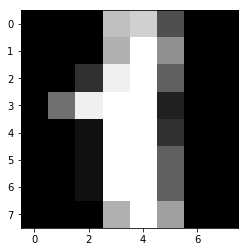

In [14]:
# 显示一张灰度图
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [21]:
# 显示一张图
def show_digits(digits_data, digits_label):
    figure = plt.figure()
    for row in range(4):
        for col in range(4):
            # 显示4x4图形
            # 方格从 1 开始算
            ax = figure.add_subplot(4, 4, row*4+ col + 1)
            img = digits_data[row*4 + col].reshape((8, 8))
            label = digits_label[row * 4 + col]
            plt.imshow(img, cmap=plt.cm.gray)
            # 一直在subplot上显示
            
            # 不显示 x、y标签
            plt.xticks([])
            plt.yticks([])
            # 每张图对应的标签
            plt.xlabel(label)
    plt.show()

In [17]:
digits = load_digits()
datas = digits.data
labels = digits.target

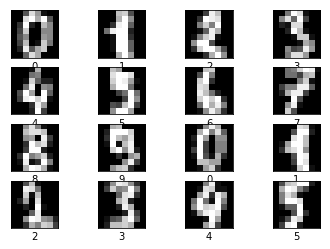

In [22]:
show_digits(datas, labels)

- 聚类之前，对数据进行标准化
- 灰度图0～15之间，标准化到0～1之间
- 

In [25]:
scale_data = scale(digits.data)
print(scale_data)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [37]:
# 多少样本、多少特征、多少数字
sample_count, feature_count = scale_data.shape
digit_count = len(np.unique(labels))
print('样点量：%d \t 特征数：%d \t 数字：%d' %(sample_count, feature_count, digit_count))

样点量：1797 	 特征数：64 	 数字：10


[1 2 2 ... 2 3 3]


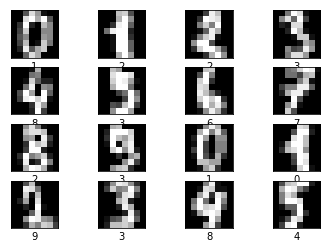

In [44]:
# 开始选中心点 聚成几类 尝试做10次聚类
# 随机生产质心，每次结果都不一样
estimator = KMeans(init='k-means++', n_clusters=digit_count, n_init=10)
estimator.fit(scale_data)

# 给聚出来的东西，标上一个标签
print(estimator.labels_)
# 聚类出来的标签, 结果不一定匹配；聚成同一类
show_digits(digits.data, estimator.labels_)

In [51]:
# 评估聚类出来的结果 —— 好不好  —— 分数
print('均方差：', estimator.inertia_)
print('均一性：', metrics.homogeneity_score(labels, estimator.labels_))
print('完整性：', metrics.completeness_score(labels, estimator.labels_))
print('综合评估：', metrics.v_measure_score(labels, estimator.labels_))

均方差： 69687.7202266693
均一性： 0.6778238757139822
完整性： 0.7170676325554005
综合评估： 0.6968937139072262
